In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

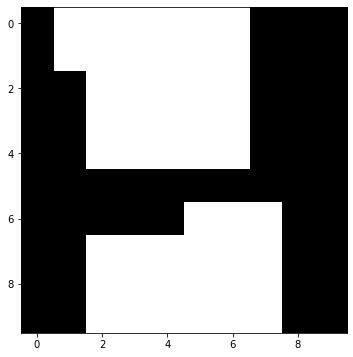

In [2]:
arr = np.zeros((10, 10), dtype = np.float64)
arr[0] = arr[8] = arr[9] = 0
for i in range(1, 7):
  arr[0, i] = 1
  arr[1, i] = 1
for i in range(2, 7):
  arr[2, i] = 1
  arr[3, i] = 1
  arr[4, i] = 1
for i in range (5, 8):
  arr[6, i] = 1
for i in range(2, 8):
  arr[7, i] = 1
  arr[8, i] = 1
  arr[9, i] = 1

fig = plt.figure(figsize=(6, 6))
plt.imshow(arr, cmap = 'gray')

**Connected Component Labelling in binary images** (Assume 4-connectivity):
```
r: top neighbor of pixel p
t: left neighbor of pixel p
m: no. of rows
n: no. of columns
Algorithm connected_component_labelling():
{
for i := 1 to m do
    for j :=1 to n do
    if intensity(p) = 1 and (intensity(r) = intensity(t) = 0) then:
         Assign a new label to pixel p
    if intensity(p) = 1 and only one of its two neighbors are 1 then:
        Assign the label of the neighbor with an intensity of 1 to pixel p
    if intensity(p) = 1 and (intensity(r) = intensity(t) = 1) then:
             if (label(r) = label(t)) then:
                  set label of pixel p to the label(t)
             else:
                assign any one of the two labels to pixel p and mark both the  labels equivalent
}
```

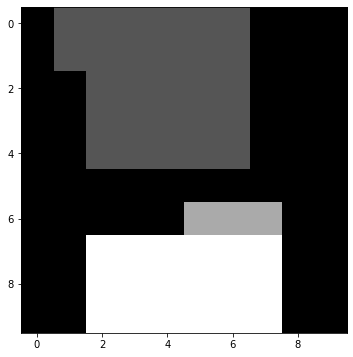

In [3]:
label = 0  # Variable to assign labels
equi_pairs=[] # List of equivalent label pairs
label_mat = np.zeros(arr.shape) # 2D matrix to store labels corresponding to the (i,j)th pixel in arr
for j in range(arr.shape[1]):
  if arr[0][j]==1:
    if arr[0][j - 1] == 1:
      label_mat[0][j] = label_mat[0][j - 1]
    else:
      label = label + 1
      label_mat[0][j] = label

for i in range(arr.shape[0]):
  if arr[i][0]==1:
    if arr[i - 1][0] == 1:
      label_mat[i][0] = label_mat[i - 1][0]
    else:
      label = label + 1
      label_mat[i][0] = label

for i in range(1, arr.shape[0]):
  for j in range(1, arr.shape[1]):
    if arr[i][j] == 1 and arr[i-1][j] == 0 and arr[i][j-1] == 0: #If top and left pixel of (i,j) is 0
      label = label + 1
      label_mat[i][j] = label     # Assign a new label to (i,j)

    if (arr[i][j] == 1 and arr[i-1][j] == 1 and arr[i][j-1] == 0) or \
        (arr[i][j] == 1 and arr[i-1][j] == 0 and arr[i][j-1] == 1): #If either of the top and right pixel of (i,j) is 1
      if arr[i-1][j] == 1:
        label_mat[i][j] = label_mat[i-1][j]
      else:
        label_mat[i][j] = label_mat[i][j-1]

    if arr[i][j] == 1 and arr[i-1][j] == 1 and arr[i][j-1] == 1: #If both top and right pixel of (i,j) is 1
      if label_mat[i-1][j] == label_mat[i][j-1]: # If both top and right pixels have the same label
        label_mat[i][j] = label_mat[i][j-1]
      else:
        label_mat[i][j] = label_mat[i][j-1]
        x = label_mat[i-1][j]
        y = label_mat[i][j-1]
        equi_pairs.append((x,y))

fig = plt.figure(figsize=(6, 6))
plt.imshow(label_mat,cmap="gray")
plt.show()

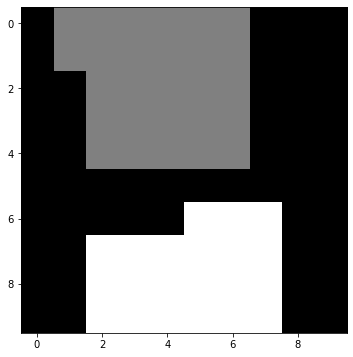

In [4]:
equiv_classes=[] # To store equivalent labels
if len(equi_pairs) != 0:
  item = equi_pairs[0]
  class1 = list(item)
  equiv_classes.append(class1)
  #print(equiv_classes)
  for i in range(1,len(equi_pairs)):
    item = equi_pairs[i]
    flag = 0
    for j in range(len(equiv_classes)):
      k = equiv_classes[j]
      if(item[0] not in k) and (item[1] in k):
        equiv_classes[j].append(item[0])
        flag = 1
        break
      if(item[0] in k) and (item[1] not in k):
        equiv_classes[j].append(item[1])
        flag = 1
        break
    if flag==0:
      equiv_classes.append(list(item))
#print(equiv_classes)

# Creating final labelled component matrix
for i in  range(label_mat.shape[0]):
  for j in range(label_mat.shape[1]):
    for k in equiv_classes:
      if label_mat[i][j] in k:
        label_mat[i][j] = k[0]

fig = plt.figure(figsize=(6, 6))
plt.imshow(label_mat,cmap="gray")
plt.show()

**Perimeter of each of the identified component**

The boundary (sometime referred as inner border of the region) of a region R is the set of pixels in R that are adjacent to pixels in the complement of R. Perimeter is the length of that boundary.
```
m : number of row
n : number of colunn
peri : image that contain boundary of different region (initialize with 0)
label_mat : label matrix that label the different connected component (geting from above algorithm)
perimrter():
{
  for i := 1 to n do
    if intensity(label_mat[0,i] not 0 then:
      peri[0,i] = label_mat[0,i]
    if intensity(label_mat[m,i]) not 0 then:
      peri[m,i] = label_mat[m,i]

  for i := 1 to n do
    if intensity(label_mat[i,0] not 0 then:
      peri[i,0] = label_mat[i,0]
    if intensity(label_mat[i,n]) not 0 then:
      peri[i,n] = label_mat[i,n]

  for i := 2 to m-1 do
    for j := 2 to n-1 do
      if label_mat[i,j] is not 0 then:
        if (label_mat[i-1,j] is 0) or (label_mat[i+1,j] is 0) or (label_mat[i,j-1] is 0) or (label_mat[i,j+1] is 0) then:
          peri[i,j] = label_mat[i,j]
  
  dist_col := number of distinct non-zero value present in peri

  for item in dist_col do
    count = 0
    for i := 1 to m do
      for j :=1 to n do
        if peri[i,j] == item then:
          count += 1
    print('Perimeter of the region with intensity', int(item), 'is: ', count)
}
```


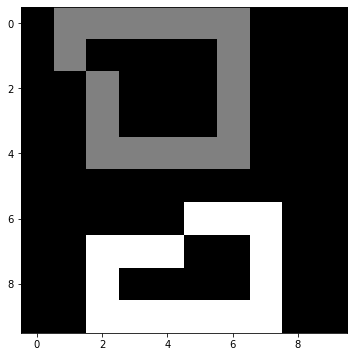


Perimeter of the region with intensity 1 is:  17
Perimeter of the region with intensity 2 is:  15


In [5]:
peri = np.zeros(arr.shape)

for j in range(arr.shape[1]):
  if label_mat[0,j] != 0:
    peri[0,j] = label_mat[0,j]
  if label_mat[arr.shape[1]-1,j] != 0:
    peri[arr.shape[1]-1,j] = label_mat[arr.shape[1]-1,j]

for i in range(arr.shape[0]):
  if label_mat[i,0] != 0:
    peri[i,0] = label_mat[i,0]
  if label_mat[i,arr.shape[0]-1] != 0:
    peri[i,arr.shape[0]-1] = label_mat[i,arr.shape[0]-1]

for i in range(1,arr.shape[0]-1):
  for j in range(1,arr.shape[1]-1):
    if label_mat[i,j] != 0:
      if label_mat[i-1,j]==0 or label_mat[i+1,j]==0 or label_mat[i,j-1] == 0 or label_mat[i,j+1] == 0:
        peri[i,j] = label_mat[i,j]

fig = plt.figure(figsize=(6, 6))
plt.imshow(peri, cmap='gray')
plt.show()
print()
dist_col = set(peri.flatten()) - {0.0}

for item in dist_col:
  count = 0
  for i in range(peri.shape[0]):
    for j in range(peri.shape[1]):
      if peri[i,j] == item:
        count += 1
  print('Perimeter of the region with intensity', int(item), 'is: ', count)